In [5]:
%pip install statsmodels
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import IV2SLS

# Simulated data with rainfall as an instrument
np.random.seed(42)
data = pd.DataFrame({
    'discount': np.random.binomial(1, 0.3, 1000),  # 1 if discount offered, 0 otherwise
    'rainfall': np.random.binomial(1, 0.5, 1000),  # 1 if rainy day, 0 otherwise
    'ride_demand': np.random.poisson(20, 1000)
})
data['ride_demand'] += data['discount'] * 5  # Increase demand with discount

# Using rainfall as an instrument to study discount effect
iv_model = IV2SLS(endog=data['ride_demand'], exog=sm.add_constant(data['rainfall']), instrument=data['discount']).fit()

print(iv_model.summary())

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
                          IV2SLS Regression Results                           
Dep. Variable:            ride_demand   R-squared:                     -11.163
Model:                         IV2SLS   Adj. R-squared:                -11.175
Method:                     Two Stage   F-statistic:                -1.852e-11
                        Least Squares   Prob (F-statistic):               1.00
Date:                Fri, 08 Nov 2024                                         
Time:                        10:30:52                                         
No. Observations:                1000                                         
Df Residuals:                     998                                         
Df Model:      

/Users/sajjadedalatzadeh/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/linear_model.py:1884: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


In [6]:
print(iv_model.diagn)

{'jb': np.float64(112.72204605626438), 'jbpv': np.float64(3.332105200945366e-25), 'skew': np.float64(-0.02311981786918015), 'kurtosis': np.float64(1.3558616233914103), 'omni': np.float64(5220.963215956805), 'omnipv': np.float64(0.0), 'condno': np.float64(2.6572204858364965), 'mineigval': np.float64(188.07017975894613)}


In [1]:
%pip install sklearn
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load sample dataset
data = load_iris()
X, y = data.data, data.target

# Initialize model
model = RandomForestClassifier()

# Apply 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)  # 'cv' specifies the number of folds

# Display scores and mean performance
print("Cross-validation scores for each fold:", scores)
print("Mean cross-validation score:", scores.mean())

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Cross-validation scores for each fold: [0.96666667 0.96666667 0.9        0.96666667 1.        ]
Mean cross-validation score: 0.9600000000000002


In [57]:
import numpy as np
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(3,4)
c = np.vstack((a, b))
np.all(c > 5)

np.False_

In [36]:
a = np.array([[1, 2, 3]])
b = expanded = np.expand_dims(a, axis=0)  # Shape: (1, 3)
c = np.squeeze(b)
(a.shape, b.shape, c.shape)

((1, 3), (1, 1, 3), (3,))

In [58]:
np.sort(np.array([3, 1, 2]))

array([1, 2, 3])

In [59]:
np.argsort([3, 1, 2])  # [1, 2, 0]

array([1, 2, 0])

In [60]:
np.unique([1,2,3,4,2,6,1])

array([1, 2, 3, 4, 6])

In [61]:
np.corrcoef([1, 2, 3], [4, 5, 6])

array([[1., 1.],
       [1., 1.]])

In [62]:
hist, bins = np.histogram([1, 2, 1, 3, 3, 3], bins=3)
print(hist, bins)

[2 1 3] [1.         1.66666667 2.33333333 3.        ]


In [74]:
np.random.choice(np.arange(35), size=(6,6), replace=False)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [132]:
df1 = pd.DataFrame({'A': [1, 2]}, dtype=np.float64)
df2 = pd.DataFrame({'B': [3, 4], 'A': [2,3]})
df = pd.merge(df1, df2, how='outer', on='A')
%timeit df.iloc[2, 1]

8.34 µs ± 36.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [134]:
%timeit df.iat[2,1]

6.44 µs ± 102 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


<Axes: ylabel='A'>

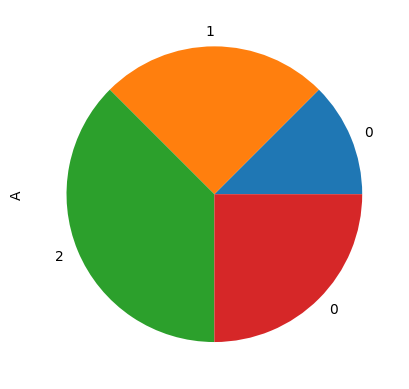

In [184]:
df2 = pd.DataFrame({'A': [2], 'B': [3]})
df3 = pd.concat([df, df2])
df3['A'].plot(kind='pie')

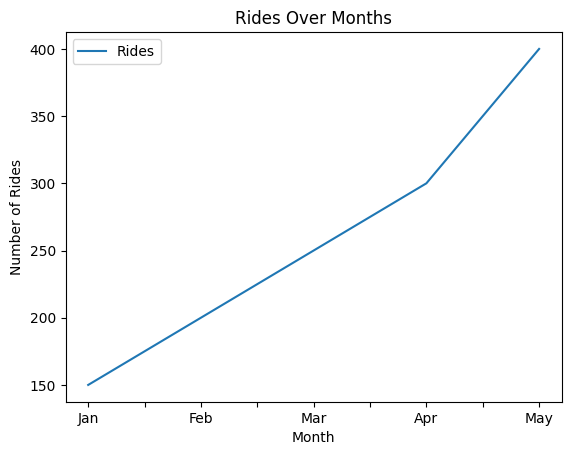

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a DataFrame
df = pd.DataFrame({
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May'],
    'Rides': [150, 200, 250, 300, 400]
})

# Plot the data
df.plot(x='Month', y='Rides', kind='line', title='Rides Over Months')
plt.ylabel('Number of Rides')
plt.show()

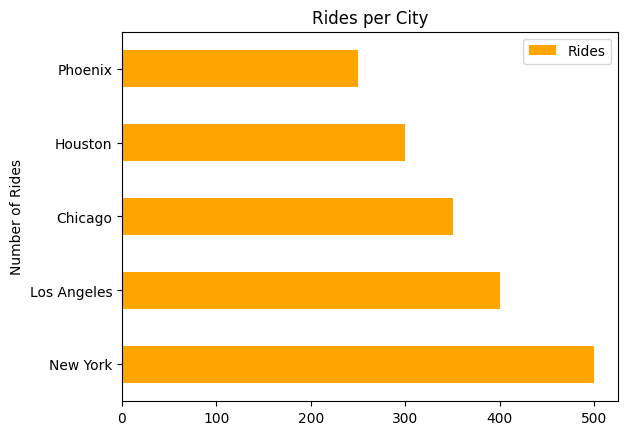

In [187]:
df = pd.DataFrame({
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'],
    'Rides': [500, 400, 350, 300, 250]
})

df.plot(x='City', y='Rides', kind='barh', title='Rides per City', color='orange')
plt.ylabel('Number of Rides')
plt.show()

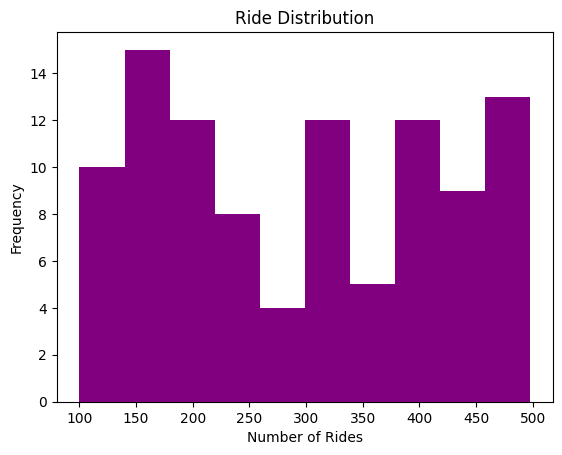

In [188]:
df = pd.DataFrame({
    'Rides': np.random.randint(100, 500, 100)  # Simulate ride counts
})

df['Rides'].plot(kind='hist', bins=10, title='Ride Distribution', color='purple')
plt.xlabel('Number of Rides')
plt.show()

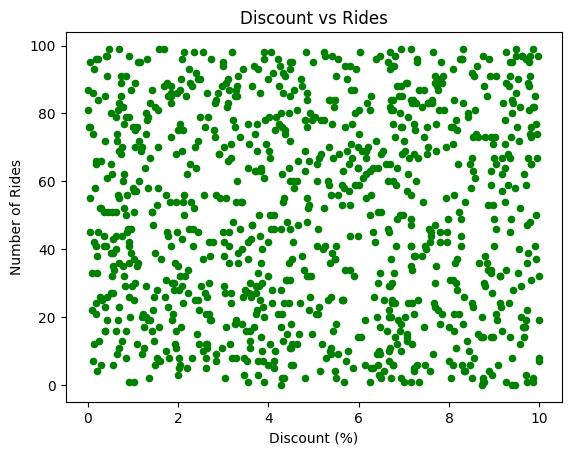

In [210]:
df = pd.DataFrame({
    'Discount (%)': 10*np.random.rand(1000),
    'Rides': np.random.randint(0,100,1000)
})

df.plot(x='Discount (%)', y='Rides', kind='scatter', title='Discount vs Rides', color='green')
plt.ylabel('Number of Rides')
plt.show()

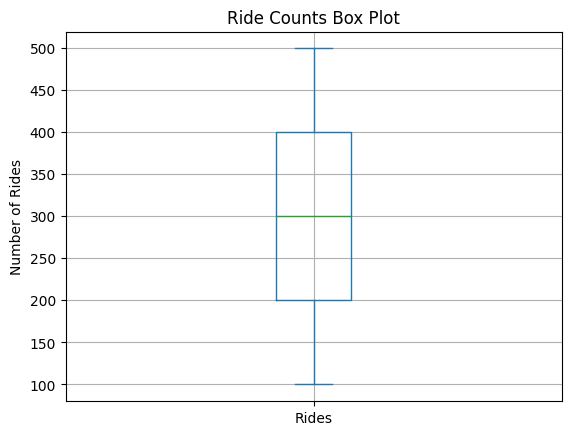

In [226]:
df = pd.DataFrame({
    'Rides': np.arange(100, 500, 1)  # Simulate ride counts
})

df.plot(kind='box', title='Ride Counts Box Plot')
plt.ylabel('Number of Rides')
plt.grid()
plt.show()

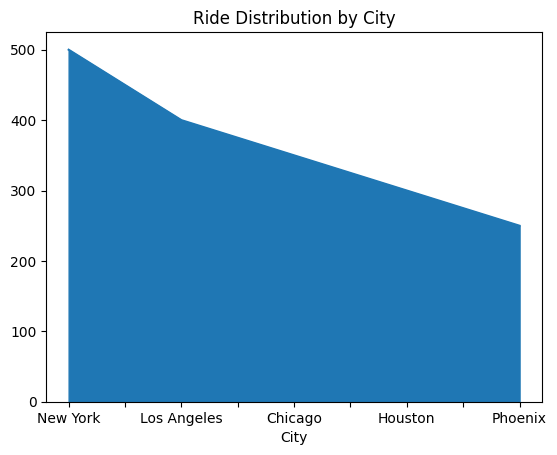

In [234]:
df = pd.DataFrame({
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'],
    'Rides': [500, 400, 350, 300, 250]
})

df.plot(kind='area', x='City', y='Rides', legend=False, title='Ride Distribution by City')
plt.ylabel('')
plt.show()

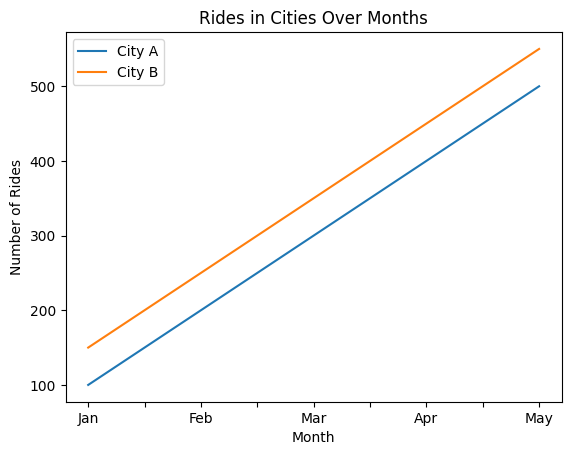

In [235]:
df = pd.DataFrame({
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May'],
    'City A': [100, 200, 300, 400, 500],
    'City B': [150, 250, 350, 450, 550]
})

df.plot(x='Month', y=['City A', 'City B'], kind='line', title='Rides in Cities Over Months')
plt.ylabel('Number of Rides')
plt.show()

In [ ]:
%pip install seaborn
import seaborn as sns

# Correlation matrix
df = pd.DataFrame({
    'Discount (%)': [5, 10, 15, 20, 25],
    'Rides': [150, 200, 300, 400, 450],
    'Revenue ($)': [1000, 1500, 2000, 2500, 3000]
})
corr = df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [244]:
from scipy import stats

# Data
data = [2, 4, 6, 8, 10]

# Mean, Median, and Mode
mean = stats.tmean(data)
median = stats.scoreatpercentile(data, 50)
mode = stats.mode(data)

print(mean,median,mode)

6.0 6.0 ModeResult(mode=np.int64(2), count=np.int64(1))


In [245]:
from scipy.interpolate import interp1d

# Data
x = [0, 1, 2, 3, 4]
y = [0, 2, 4, 6, 8]

# Interpolate
f = interp1d(x, y, kind='linear')
result = f(2.5)
print(f"Interpolated value at 2.5: {result}")

Interpolated value at 2.5: 5.0


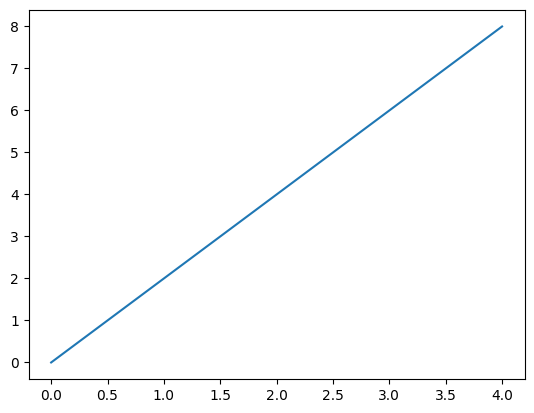

In [252]:
import matplotlib.pyplot as plt

x = np.linspace(0,4,100)
plt.plot(x, f(x))

In [260]:
from scipy import stats

data = [1, 2, 3, 4, 4, 5, 5, 5]

stats.describe(data)

DescribeResult(nobs=8, minmax=(np.int64(1), np.int64(5)), mean=np.float64(3.625), variance=np.float64(2.267857142857143), skewness=np.float64(-0.6581809699763616), kurtosis=np.float64(-0.9249178498356998))

In [261]:
from scipy.stats import ks_2samp, norm
import numpy as np

# Fake data: Wait times in two cities
x= np.linspace(0, 20, 100)
city_a_wait_times = norm.cdf(x, 10, 4)  # Mean 8, Std 2
city_b_wait_times = norm.cdf(x, 10, 2)  # Mean 10, Std 2

# Two-sample KS test
stat, p_val = ks_2samp(city_a_wait_times, city_b_wait_times)

print(f"KS Statistic: {stat}")
print(f"P-Value: {p_val}")

if p_val < 0.05:
    print("The two distributions are significantly different.")
else:
    print("The two distributions are not significantly different.")

KS Statistic: 0.25
P-Value: 0.0037294923618311367
The two distributions are significantly different.


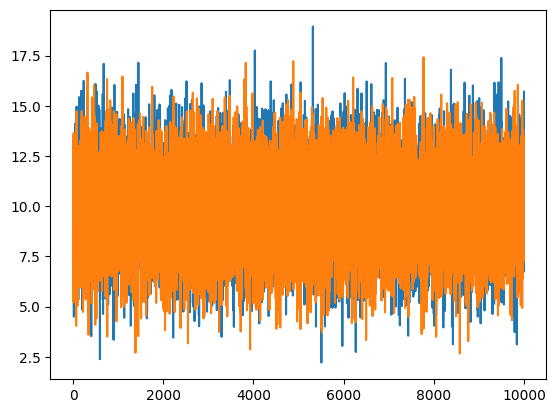

In [160]:
import matplotlib.pyplot as plt
x = np.arange(0,10000, 1)
plt.plot(x, city_a_wait_times, city_b_wait_times)

In [262]:
from scipy.stats import anderson
import numpy as np

# Fake data: Ride wait times
ride_wait_times = np.random.normal(8, 2, 100)  # Mean 8, Std 2

# Anderson-Darling test for normality
result = anderson(ride_wait_times, dist='norm')

print(f"Test Statistic: {result.statistic}")
print(f"Critical Values: {result.critical_values}")
print(f"Significance Levels: {result.significance_level}")

# Interpretation
for sig_level, crit_value in zip(result.significance_level, result.critical_values):
    if result.statistic > crit_value:
        print(f"Reject null hypothesis at {sig_level}% significance level.")
    else:
        print(f"Fail to reject null hypothesis at {sig_level}% significance level.")

Test Statistic: 0.17856846416607652
Critical Values: [0.555 0.632 0.759 0.885 1.053]
Significance Levels: [15.  10.   5.   2.5  1. ]
Fail to reject null hypothesis at 15.0% significance level.
Fail to reject null hypothesis at 10.0% significance level.
Fail to reject null hypothesis at 5.0% significance level.
Fail to reject null hypothesis at 2.5% significance level.
Fail to reject null hypothesis at 1.0% significance level.


In [266]:
result.fit_result.success

True

In [275]:
import pandas as pd
pd.date_range("2023-01-01", periods=100)
pd.DataFrame({"value": range(100)}, index=pd.date_range("2023-01-01", periods=100))

,value
2023-01-01,0
2023-01-02,1
2023-01-03,2
2023-01-04,3
2023-01-05,4
...,...
2023-04-06,95
2023-04-07,96
2023-04-08,97
2023-04-09,98


In [296]:
import numpy as np

def minibatch_gradient_descent(X, y, lr=0.01, batch_size=10, epochs=100):
    """
    Mini-batch gradient descent for linear regression.
    
    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.
        lr (float): Learning rate.
        batch_size (int): Size of each mini-batch.
        epochs (int): Number of training epochs.
    
    Returns:
        w (np.ndarray): Final weights.
        losses (list): Loss values per epoch.
    """
    # Initialize weights
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    losses = []
    
    for epoch in range(epochs):
        # Shuffle data
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        X = X[indices]
        y = y[indices]
        
        # Mini-batch processing
        for i in range(0, n_samples, batch_size):
            X_batch = X[i:i + batch_size]
            y_batch = y[i:i + batch_size]
            
            # Predict and calculate error
            y_pred = np.dot(X_batch, w)
            error = y_pred - y_batch
            
            # Gradient and update
            gradient = np.dot(X_batch.T, error)
            w -= lr * gradient
        
        # Compute loss for monitoring
        loss = np.sum((np.dot(X, w) - y) ** 2)
        losses.append(loss)
    
    return w, losses

# Example Usage
np.random.seed(0)
X = np.random.rand(100, 2)  # 100 samples, 2 features
y = 3 * X[:, 0] + 5 * X[:, 1] + np.random.randn(100) * 0.1

weights, losses = minibatch_gradient_descent(X, y, lr=0.1, batch_size=10, epochs=200)
print(f"Final Weights: {weights}")

Final Weights: [2.9511187  4.99203893]


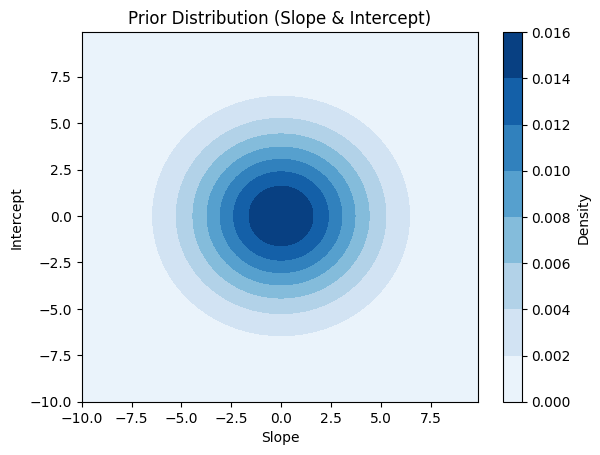

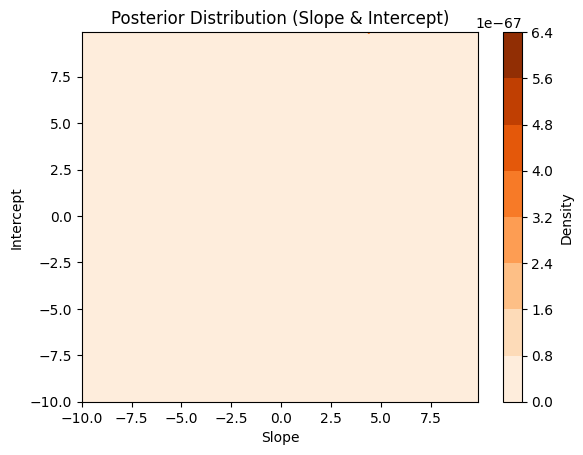

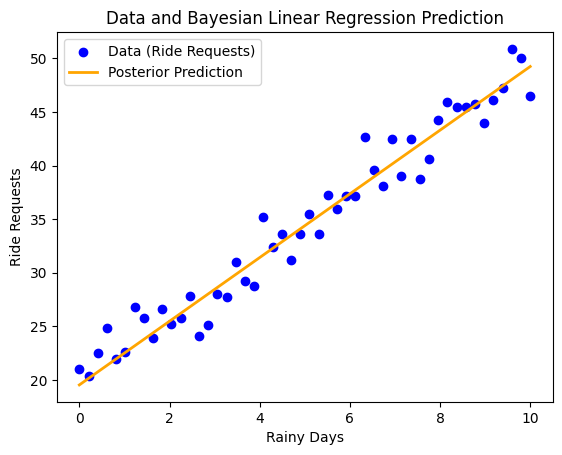

Posterior Mean (Slope, Intercept): [ 2.97138718 19.53582964]
Posterior Covariance:
 [[ 0.00900913 -0.04468814]
 [-0.04468814  0.30103243]]


In [297]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Set random seed for reproducibility
np.random.seed(42)

# Generate artificial data
true_slope = 3  # True relationship between x and y
true_intercept = 20  # True intercept
noise_std = 2  # Standard deviation of noise

# Features (number of rainy days in a month)
x = np.linspace(0, 10, 50)
# Targets (average ride requests per month)
y = true_slope * x + true_intercept + np.random.normal(0, noise_std, size=len(x))

# Prior distribution: Assume we don't know the true slope and intercept
# Mean and covariance of the prior
prior_mean = np.array([0, 0])  # Prior mean for slope and intercept
prior_cov = np.array([[10, 0], [0, 10]])  # Covariance matrix

# Visualize prior
x_slope, y_intercept = np.mgrid[-10:10:0.1, -10:10:0.1]
pos = np.dstack((x_slope, y_intercept))
prior_pdf = multivariate_normal(prior_mean, prior_cov).pdf(pos)

plt.contourf(x_slope, y_intercept, prior_pdf, cmap="Blues")
plt.title("Prior Distribution (Slope & Intercept)")
plt.xlabel("Slope")
plt.ylabel("Intercept")
plt.colorbar(label="Density")
plt.show()

# Bayesian update: Compute posterior
# Likelihood matrix (design matrix with x values)
X = np.vstack([x, np.ones(len(x))]).T
likelihood_cov = noise_std**2 * np.eye(len(x))  # Likelihood covariance matrix

# Posterior mean
posterior_cov = np.linalg.inv(
    np.linalg.inv(prior_cov) + X.T @ np.linalg.inv(likelihood_cov) @ X
)
posterior_mean = posterior_cov @ (
    np.linalg.inv(prior_cov) @ prior_mean + X.T @ np.linalg.inv(likelihood_cov) @ y
)

# Visualize posterior
posterior_pdf = multivariate_normal(posterior_mean, posterior_cov).pdf(pos)

plt.contourf(x_slope, y_intercept, posterior_pdf, cmap="Oranges")
plt.title("Posterior Distribution (Slope & Intercept)")
plt.xlabel("Slope")
plt.ylabel("Intercept")
plt.colorbar(label="Density")
plt.show()

# Predictions with the posterior
posterior_slope, posterior_intercept = posterior_mean
y_pred = posterior_slope * x + posterior_intercept

# Plot the data and posterior predictions
plt.scatter(x, y, label="Data (Ride Requests)", color="blue")
plt.plot(x, y_pred, label="Posterior Prediction", color="orange", linewidth=2)
plt.title("Data and Bayesian Linear Regression Prediction")
plt.xlabel("Rainy Days")
plt.ylabel("Ride Requests")
plt.legend()
plt.show()

# Print results
print("Posterior Mean (Slope, Intercept):", posterior_mean)
print("Posterior Covariance:\n", posterior_cov)

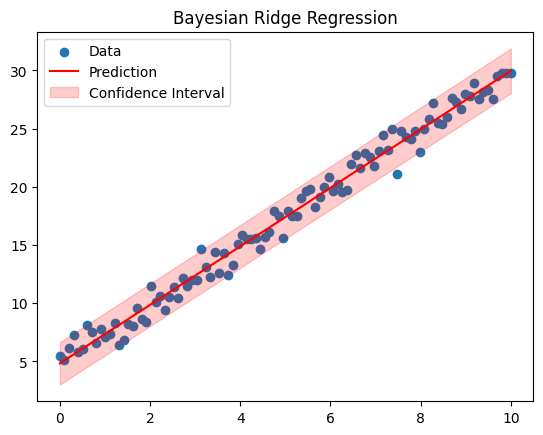

Slope: 2.513408110261747
Intercept: 4.829112931297173


In [298]:
from sklearn.linear_model import BayesianRidge
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
x = np.linspace(0, 10, 100).reshape(-1, 1)
true_slope = 2.5
true_intercept = 5
y = true_slope * x.flatten() + true_intercept + np.random.normal(0, 1, size=len(x))

# Fit Bayesian Ridge Regression
model = BayesianRidge()
model.fit(x, y)

# Predictions
y_pred, std = model.predict(x, return_std=True)

# Plot results
plt.scatter(x, y, label="Data")
plt.plot(x, y_pred, label="Prediction", color="red")
plt.fill_between(x.flatten(), y_pred - 2*std, y_pred + 2*std, color="red", alpha=0.2, label="Confidence Interval")
plt.legend()
plt.title("Bayesian Ridge Regression")
plt.show()

# Model coefficients
print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

import pymc as pm

from pymc import HalfCauchy, Model, Normal, sample

print(f"Running on PyMC v{pm.__version__}")

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC v5.12.0


In [2]:
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

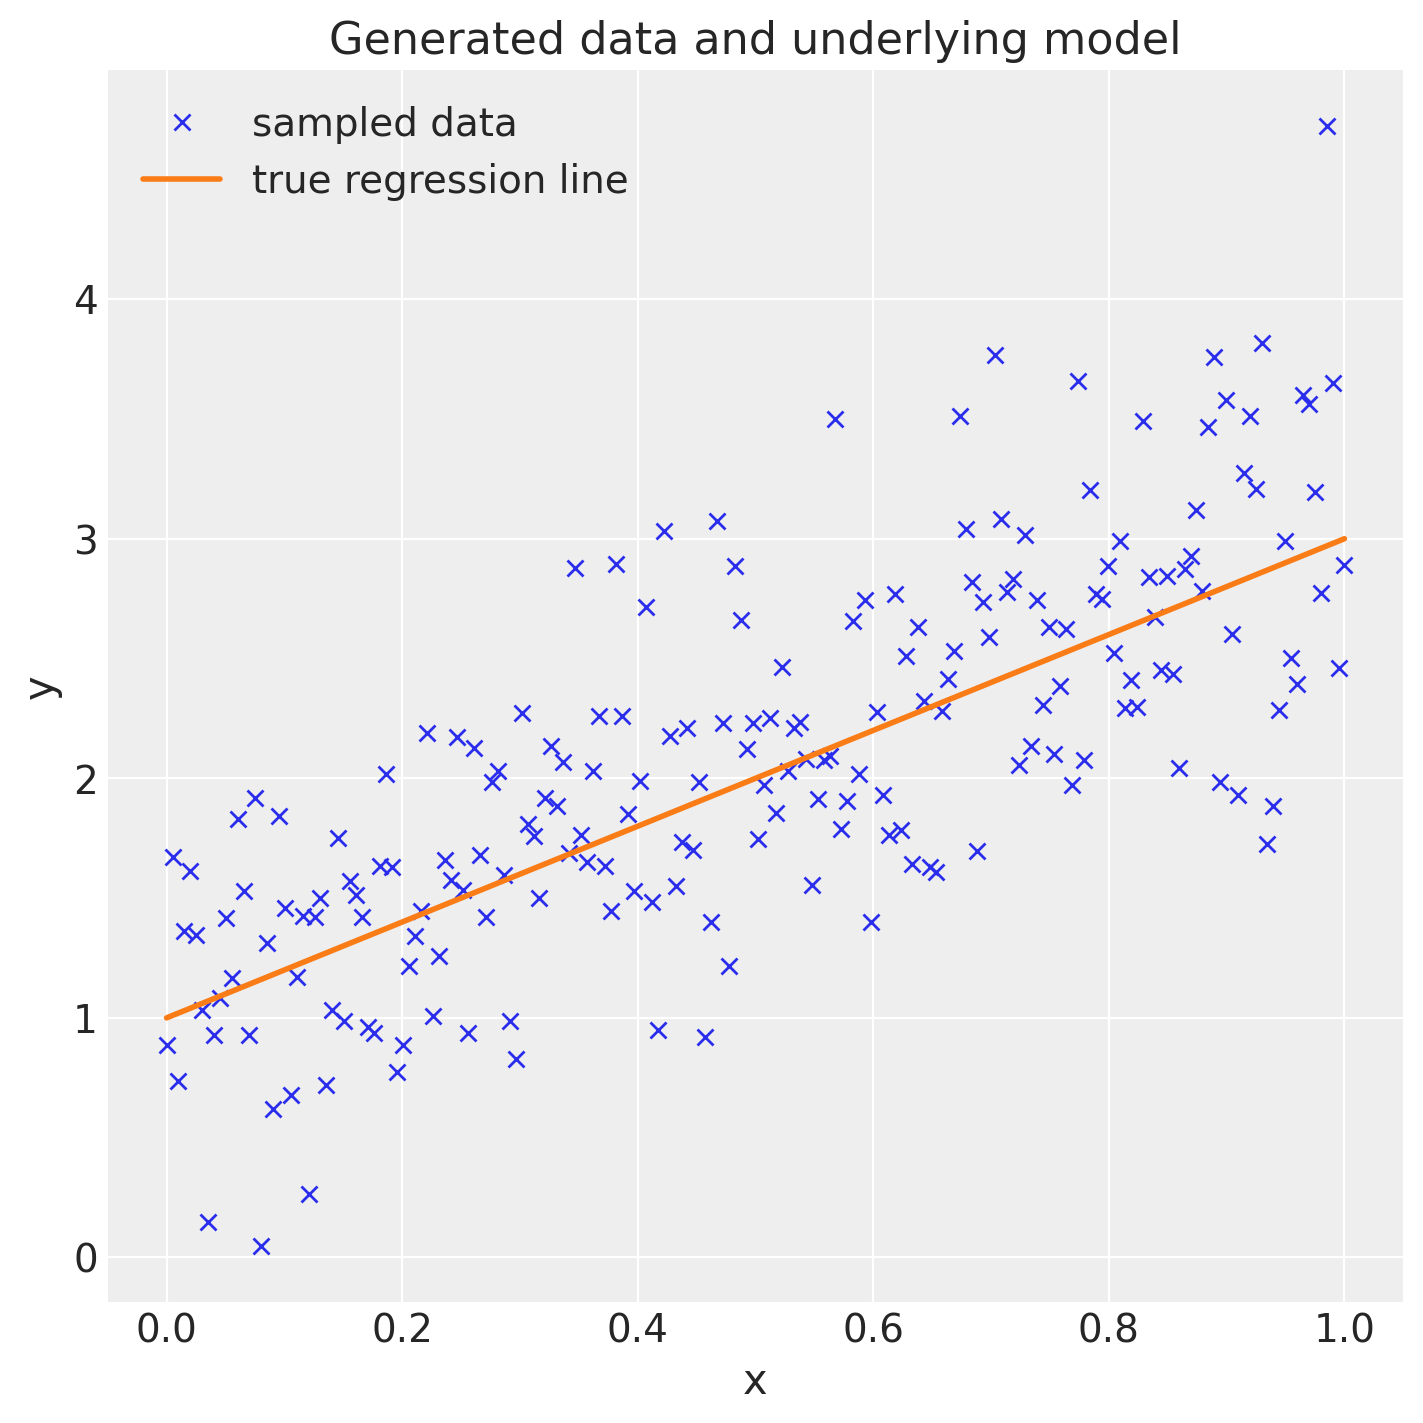

In [3]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + rng.normal(scale=0.5, size=size)

data = pd.DataFrame({"x": x, "y": y})

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x, y, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
plt.legend(loc=0);

In [4]:
with Model() as model:  # model specifications in PyMC are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy("sigma", beta=10)
    intercept = Normal("Intercept", 0, sigma=20)
    slope = Normal("slope", 0, sigma=20)

    # Define likelihood
    likelihood = Normal("y", mu=intercept + slope * x, sigma=sigma, observed=y)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    idata = sample(3000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, slope]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 2 seconds.


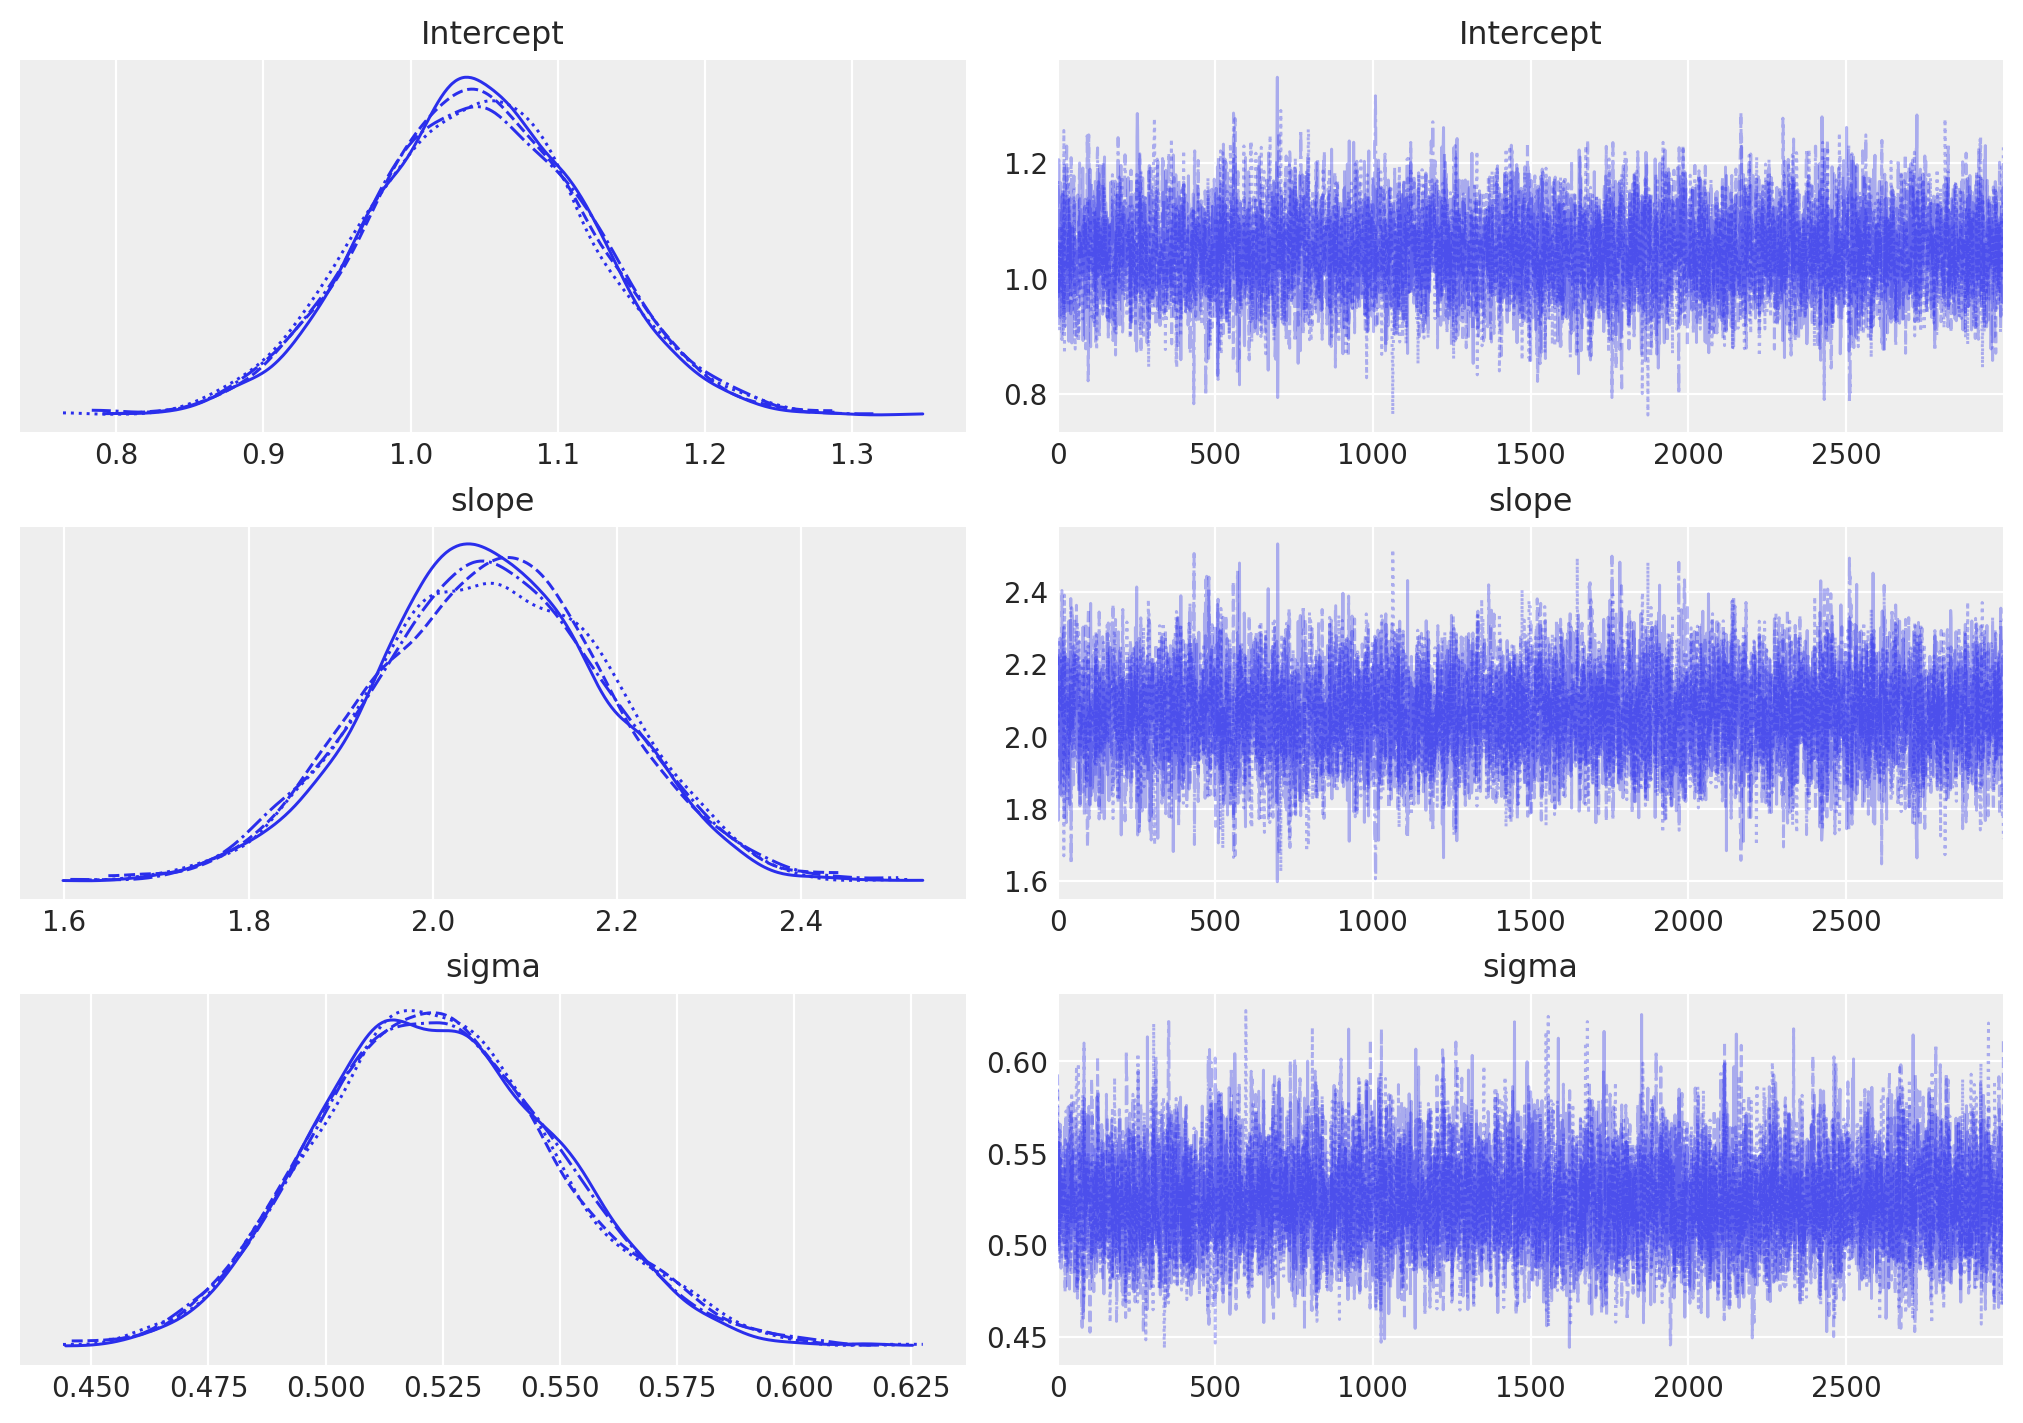

In [5]:
az.plot_trace(idata, figsize=(10, 7));

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [y_sigma, Intercept, x]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 2 seconds.
/Users/sajjadedalatzadeh/Library/Python/3.9/lib/python/site-packages/arviz/plots/lmplot.py:211: UserWarning: posterior_predictive not found in idata
  warnings.warn("posterior_predictive not found in idata", UserWarning)


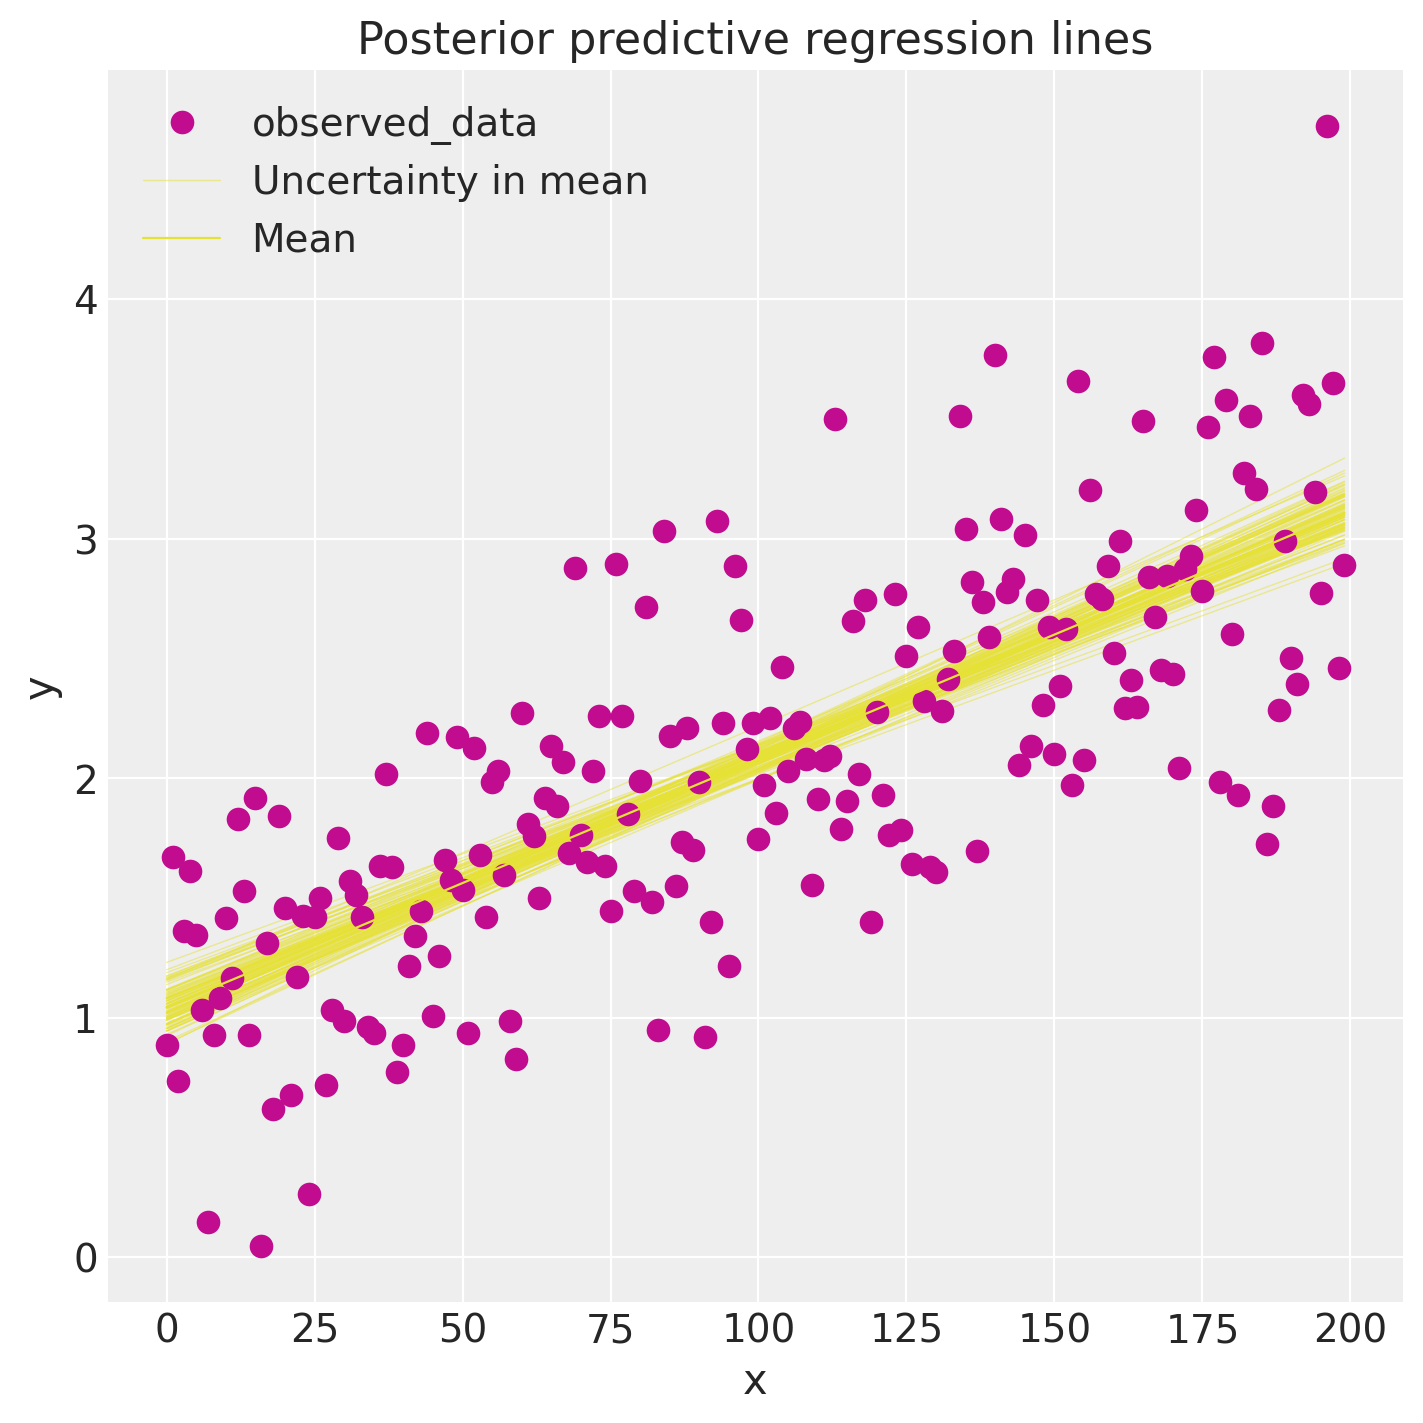

In [6]:
try:
    import bambi as bmb
except ImportError:
    !{sys.executable} -m pip install -q --upgrade bambi
    import bambi as bmb

model = bmb.Model("y ~ x", data)
idata = model.fit(draws=3000)

idata.posterior["y_model"] = idata.posterior["Intercept"] + idata.posterior["x"] * xr.DataArray(x)

_, ax = plt.subplots(figsize=(7, 7))
az.plot_lm(idata=idata, y="y", num_samples=100, axes=ax, y_model="y_model")
ax.set_title("Posterior predictive regression lines")
ax.set_xlabel("x");